# Webscraping Example

In [1]:
import datetime

import pandas as pd
import requests
from bs4 import BeautifulSoup
from dateutil.relativedelta import relativedelta
import time

In [2]:
baseUrl ='https://www.ogimet.com/cgi-bin/gsodres?ind=875480-99999&ord=DIR&ano=<year>&mes=<month>&day=<day>&ndays=<day>'

In [3]:
year = 2016
month = 1
day= 31

months_to_download = 36

init_date = datetime.date(year, month, day)

In [4]:
final_dataframe = pd.DataFrame()

In [5]:
for m in range(months_to_download):
    current_date = (init_date + relativedelta(months=m, day=31))
    replacedUrl = baseUrl.replace("<day>", str(current_date.day)).replace("<month>", str(current_date.month)).replace(
        "<year>", str(current_date.year))
    print(replacedUrl)

    response = requests.get(replacedUrl)

    print(response)

    soup = BeautifulSoup(response.text, "html.parser")
        
    table = pd.read_html(str(soup.findAll('tr')[1]))

    table_data = table[2]
    
    del table_data['Diario']
    
    final_dataframe = final_dataframe.append(table_data)
    
    
    
    
    
    time.sleep(5)

https://www.ogimet.com/cgi-bin/gsodres?ind=875480-99999&ord=DIR&ano=2016&mes=1&day=31&ndays=31
<Response [200]>
https://www.ogimet.com/cgi-bin/gsodres?ind=875480-99999&ord=DIR&ano=2016&mes=2&day=29&ndays=29
<Response [200]>
https://www.ogimet.com/cgi-bin/gsodres?ind=875480-99999&ord=DIR&ano=2016&mes=3&day=31&ndays=31
<Response [200]>
https://www.ogimet.com/cgi-bin/gsodres?ind=875480-99999&ord=DIR&ano=2016&mes=4&day=30&ndays=30
<Response [200]>
https://www.ogimet.com/cgi-bin/gsodres?ind=875480-99999&ord=DIR&ano=2016&mes=5&day=31&ndays=31
<Response [200]>
https://www.ogimet.com/cgi-bin/gsodres?ind=875480-99999&ord=DIR&ano=2016&mes=6&day=30&ndays=30
<Response [200]>
https://www.ogimet.com/cgi-bin/gsodres?ind=875480-99999&ord=DIR&ano=2016&mes=7&day=31&ndays=31
<Response [200]>
https://www.ogimet.com/cgi-bin/gsodres?ind=875480-99999&ord=DIR&ano=2016&mes=8&day=31&ndays=31
<Response [200]>
https://www.ogimet.com/cgi-bin/gsodres?ind=875480-99999&ord=DIR&ano=2016&mes=9&day=30&ndays=30
<Response

In [6]:
final_dataframe.head()

Fecha Hr.Med(%) Nie.(cm) Prec(mm) Presion(mb)         Temperatura(°C)  \
        Fecha Hr.Med(%) Nie.(cm) Prec(mm)         Est     Mar             Max   
0  2016/01/01      71.8      NaN      7.9      1000.1  1009.5            31.4   
1  2016/01/02      67.8      NaN        0        1002  1011.4            32.1   
2  2016/01/03      79.1      NaN        0        1001  1010.4            31.6   
3  2016/01/04      91.5      NaN        0       999.6    1009            26.9   
4  2016/01/05      79.6      NaN      9.9      1002.6    1012            28.4   

              Viento(km/h)            Vis(km)  
    Med   Min          Max   Med  Rch Vis(km)  
0    24  18.4         27.8  16.7  NaN    12.4  
1  25.6  20.3         25.9  19.3  NaN    12.8  
2  23.7    20           37  21.7  NaN    12.6  
3  22.2  20.8         18.3  10.7  NaN    10.4  
4  23.6  19.8         24.1  14.4  NaN    11.3

In [7]:
final_dataframe.to_csv("final_dataframe_junin.csv", index=False,)

----------------------------------

--------------------------

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("final_dataframe_junin.csv")

In [4]:
data.head()

,Fecha,Hr.Med(%),Nie.(cm),Prec(mm),Presion(mb),Presion(mb).1,Temperatura(°C),Temperatura(°C).1,Temperatura(°C).2,Viento(km/h),Viento(km/h).1,Viento(km/h).2,Vis(km)
0,Fecha,Hr.Med(%),Nie.(cm),Prec(mm),Est,Mar,Max,Med,Min,Max,Med,Rch,Vis(km)
1,2016/01/01,71.8,NaN,7.9,1000.1,1009.5,31.4,24.0,18.4,27.8,16.7,NaN,12.4
2,2016/01/02,67.8,NaN,0.0,1002.0,1011.4,32.1,25.6,20.3,25.9,19.3,NaN,12.8
3,2016/01/03,79.1,NaN,0.0,1001.0,1010.4,31.6,23.7,20.0,37.0,21.7,NaN,12.6
4,2016/01/04,91.5,NaN,0.0,999.6,1009.0,26.9,22.2,20.8,18.3,10.7,NaN,10.4


In [8]:
data['Nie.(cm)'].unique()

array(['Nie.(cm)', nan, '----', '1', '3', '2'], dtype=object)

In [13]:
data[data['Nie.(cm)'].notnull() & (data['Nie.(cm)']!='----')]

,Fecha,Hr.Med(%),Nie.(cm),Prec(mm),Presion(mb),Presion(mb).1,Temperatura(°C),Temperatura(°C).1,Temperatura(°C).2,Viento(km/h),Viento(km/h).1,Viento(km/h).2,Vis(km)
0,Fecha,Hr.Med(%),Nie.(cm),Prec(mm),Est,Mar,Max,Med,Min,Max,Med,Rch,Vis(km)
1002,2018/09/28,91.2,1,6.9,1001.4,1011.0,22.0,16.8,11.8,42.4,26.9,NaN,8.7
1023,2018/10/19,76.1,1,0.0,1013.3,1023.0,23.5,14.8,9.6,27.8,23.2,NaN,11.5
1026,2018/10/22,74.3,1,3.0,1006.0,1015.8,21.1,15.8,9.0,18.3,8.0,NaN,10.0
1028,2018/10/24,84.0,1,16.0,1011.3,1021.1,20.6,11.7,9.5,22.2,18.5,NaN,10.7
1029,2018/10/25,78.5,1,0.0,1009.1,1019.0,19.2,13.8,9.7,16.5,12.2,NaN,12.6
1034,2018/10/30,88.1,3,32.0,999.3,1008.8,25.4,18.0,16.5,22.2,11.9,NaN,10.9
1035,2018/10/31,84.1,2,17.0,1004.5,1014.1,21.5,15.6,13.4,22.2,13.1,NaN,13.1


In [14]:
data_ok = pd.read_csv("final_dataframe_junin_ok.csv")

In [15]:
data_ok.head()

,Fecha,Hr.Med(%),Nie.(cm),Prec(mm),Presion(mb).Est,Presion(mb).Mar,Temperatura(°C).Max,Temperatura(°C).Med,Temperatura(°C).Min,Viento(km/h).Max,Viento(km/h).Med,Rch,Vis(km)
0,2016/01/01,71.8,NaN,7.9,1000.1,1009.5,31.4,24.0,18.4,27.8,16.7,NaN,12.4
1,2016/01/02,67.8,NaN,0.0,1002.0,1011.4,32.1,25.6,20.3,25.9,19.3,NaN,12.8
2,2016/01/03,79.1,NaN,0.0,1001.0,1010.4,31.6,23.7,20.0,37.0,21.7,NaN,12.6
3,2016/01/04,91.5,NaN,0.0,999.6,1009.0,26.9,22.2,20.8,18.3,10.7,NaN,10.4
4,2016/01/05,79.6,NaN,9.9,1002.6,1012.0,28.4,23.6,19.8,24.1,14.4,NaN,11.3


In [18]:
data_ok[data_ok['Rch'].notnull() & (data_ok['Rch']!='----')]

,Fecha,Hr.Med(%),Nie.(cm),Prec(mm),Presion(mb).Est,Presion(mb).Mar,Temperatura(°C).Max,Temperatura(°C).Med,Temperatura(°C).Min,Viento(km/h).Max,Viento(km/h).Med,Rch,Vis(km)
54,2016/02/24,77.3,NaN,----,998.5,1007.8,32.3,26.0,18.0,27.8,5.6,59.4,12.6
273,2016/09/30,80.6,NaN,3.0,1009.7,1019.6,15.2,11.6,7.8,31.3,21.7,31.7,10.6
286,2016/10/13,80.1,NaN,7.1,1000.2,1009.7,28.2,18.4,13.8,25.9,13.7,63.0,12.6
291,2016/10/18,80.7,NaN,0.0,1005.9,1015.6,22.0,14.3,11.2,37.0,24.8,68.3,10.6
320,2016/11/16,35.6,NaN,0.0,1003.3,1012.9,29.2,18.8,14.1,22.2,16.1,35.2,13.0
330,2016/11/26,65.7,NaN,26.9,996.3,1005.7,32.5,21.1,17.7,35.2,23.5,72.2,12.6
332,2016/11/28,65.0,NaN,1.0,1005.8,1015.3,29.4,20.1,16.5,22.2,16.9,42.4,12.6
339,2016/12/05,65.0,NaN,0.0,995.9,1005.2,35.0,22.1,18.9,31.7,16.9,40.7,11.9
356,2016/12/22,81.8,NaN,58.9,998.9,1008.2,34.3,20.7,16.5,33.5,18.5,51.9,9.8
360,2016/12/26,80.8,NaN,23.9,993.3,1002.7,28.5,24.1,19.5,25.9,12.6,72.2,11.7


In [19]:
del data_ok['Nie.(cm)']
del data_ok['Rch']

In [20]:
data_ok.head()

,Fecha,Hr.Med(%),Prec(mm),Presion(mb).Est,Presion(mb).Mar,Temperatura(°C).Max,Temperatura(°C).Med,Temperatura(°C).Min,Viento(km/h).Max,Viento(km/h).Med,Vis(km)
0,2016/01/01,71.8,7.9,1000.1,1009.5,31.4,24.0,18.4,27.8,16.7,12.4
1,2016/01/02,67.8,0.0,1002.0,1011.4,32.1,25.6,20.3,25.9,19.3,12.8
2,2016/01/03,79.1,0.0,1001.0,1010.4,31.6,23.7,20.0,37.0,21.7,12.6
3,2016/01/04,91.5,0.0,999.6,1009.0,26.9,22.2,20.8,18.3,10.7,10.4
4,2016/01/05,79.6,9.9,1002.6,1012.0,28.4,23.6,19.8,24.1,14.4,11.3


In [21]:
data_ok.to_csv('rain_junin.csv', index=False)

In [22]:
rain_junin = pd.read_csv("rain_junin.csv")

In [23]:
rain_junin.head()

,Fecha,Hr.Med(%),Prec(mm),Presion(mb).Est,Presion(mb).Mar,Temperatura(°C).Max,Temperatura(°C).Med,Temperatura(°C).Min,Viento(km/h).Max,Viento(km/h).Med,Vis(km)
0,2016/01/01,71.8,7.9,1000.1,1009.5,31.4,24.0,18.4,27.8,16.7,12.4
1,2016/01/02,67.8,0.0,1002.0,1011.4,32.1,25.6,20.3,25.9,19.3,12.8
2,2016/01/03,79.1,0.0,1001.0,1010.4,31.6,23.7,20.0,37.0,21.7,12.6
3,2016/01/04,91.5,0.0,999.6,1009.0,26.9,22.2,20.8,18.3,10.7,10.4
4,2016/01/05,79.6,9.9,1002.6,1012.0,28.4,23.6,19.8,24.1,14.4,11.3


In [24]:
rain_junin.describe()

,Hr.Med(%),Prec(mm),Presion(mb).Est,Presion(mb).Mar,Temperatura(°C).Max,Temperatura(°C).Med,Temperatura(°C).Min,Viento(km/h).Max,Viento(km/h).Med,Vis(km)
count,1066.000000,1050.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1065.000000,1066.000000,1066.000000
mean,69.875141,3.424095,1005.528424,1015.193621,23.837523,16.232176,10.133865,24.056901,14.788180,12.209287
std,12.923685,11.106181,6.087682,6.271942,6.503449,5.732337,5.833879,8.268677,5.480464,2.315869
min,29.400000,0.000000,991.100000,1000.400000,8.600000,2.800000,-6.200000,7.600000,2.800000,2.600000
25%,60.900000,0.000000,1001.400000,1010.900000,18.825000,11.600000,6.000000,18.300000,10.900000,11.100000
50%,70.500000,0.000000,1005.100000,1014.850000,24.200000,16.450000,10.200000,24.100000,14.100000,12.600000
75%,79.500000,0.000000,1009.600000,1019.400000,29.200000,20.800000,14.875000,29.400000,18.500000,13.900000
max,97.800000,151.900000,1024.800000,1034.900000,36.800000,29.000000,22.500000,53.500000,38.700000,17.200000


In [9]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [10]:
url = "https://www.ogimet.com/cgi-bin/gsodres?ind=875480-99999&ord=DIR&ano=2016&mes=1&day=31&ndays=31"
response = requests.get(url)

In [12]:
response

<Response [200]>

In [13]:
response.text

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">\n<HTML>\n<HEAD>\n<TITLE>Resumen diario</TITLE>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n<meta name="Author" content="G. Ballester Valor">\n<meta name="robots" content="noindex,nofollow">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<meta name="keywords" content="synop, synop ship, temperatura, punto de rocio, sensacion termica, indice de calor, humedad relativa, precipitacion, viento, tiempo significativo, temperatura maxima, temperatura minima, mensajes synop">\n<link rel="stylesheet" href="/ogimet.css">\n<link rel="stylesheet" type="text/css" href="//cdnjs.cloudflare.com/ajax/libs/cookieconsent2/3.0.3/cookieconsent.min.css" />\n<script src="//cdnjs.cloudflare.com/ajax/libs/cookieconsent2/3.0.3/cookieconsent.min.js"></script>\n<script>\nwindow.addEventListener("load", function(){\nwindow.cookieconsent.initialise({\n  "palette": {\n    "popup": {\n      "background": 

In [14]:
soup = BeautifulSoup(response.text, "html.parser")

In [17]:
soup.findAll('tr')[1]

<tr>
<!--barra izquierda-->
<td align="center" bgcolor="#FFFFDD" valign="top">
<h2><font color="#F05050"><a href="/index.phtml">OGIMET</a></font></h2>
<h5><font color="#F05050"><a href="/index.phtml.en">English version</a></font></h5>
<hr size="1"/>
<div><font color="#30A050" size="-1"><strong>METEOSAT</strong></font></div>
<div><a href="/cgi-bin/gmsat2"><img alt="Últimos meteosat / metar" border="0" src="/mapabase/geos/bluem/latest-mpe_ir_s.jpg" style="max-width: 100%" title="Últimos meteosat / metar"/>
<br/><b>M</b>eteosat-9/metar</a></div>
<div><a href="/loopir2d2.phtml"><b>B</b>ucle meteosat-9 VIS-IR</a></div>
<hr size="1"/>
<div><font color="#30A050" size="-1"><strong>MODELOS NUMÉRICOS</strong></font></div>
<div><a href="/tabla_pred.phtml"><img alt="Mapas modelo GFS" border="0" src="/tmp/gfsmodel.gif" style="max-width: 100%"/><br/><b>G</b>FS 7 días
</a></div>
<hr size="1"/>
<div><font color="#30A050" size="-1"><strong>METEOGRAMAS</strong></font></div>
<div><a href="/gramet_aero.ph

In [ ]:
pd.read_

In [18]:
table = pd.read_html(str(soup.findAll('tr')[1]))

In [19]:
table

[                                                   0
 0  Advertencia: Estos datos estÃ¡n basados en los...,
                                                    0
 0  875480-99999 'SAAJ': JUNIN AERO (ARGENTINA) La...,
          Fecha Temperatura(°C)             Hr.Med(%) Viento(km/h)        \
          Fecha             Max   Min   Med Hr.Med(%)          Max   Med   
 0   2016/01/01            31.4  18.4  24.0      71.8         27.8  16.7   
 1   2016/01/02            32.1  20.3  25.6      67.8         25.9  19.3   
 2   2016/01/03            31.6  20.0  23.7      79.1         37.0  21.7   
 3   2016/01/04            26.9  20.8  22.2      91.5         18.3  10.7   
 4   2016/01/05            28.4  19.8  23.6      79.6         24.1  14.4   
 5   2016/01/06            29.1  13.6  21.8      53.2         20.6  17.2   
 6   2016/01/07            28.0  14.0  21.4      60.1         16.5   9.4   
 7   2016/01/08            29.0  17.0  22.5      66.0         14.8   8.3   
 8   2016/01/09       

In [20]:
table_data = table[2]

In [21]:
table_data

Fecha Temperatura(°C)             Hr.Med(%) Viento(km/h)        \
         Fecha             Max   Min   Med Hr.Med(%)          Max   Med   
0   2016/01/01            31.4  18.4  24.0      71.8         27.8  16.7   
1   2016/01/02            32.1  20.3  25.6      67.8         25.9  19.3   
2   2016/01/03            31.6  20.0  23.7      79.1         37.0  21.7   
3   2016/01/04            26.9  20.8  22.2      91.5         18.3  10.7   
4   2016/01/05            28.4  19.8  23.6      79.6         24.1  14.4   
5   2016/01/06            29.1  13.6  21.8      53.2         20.6  17.2   
6   2016/01/07            28.0  14.0  21.4      60.1         16.5   9.4   
7   2016/01/08            29.0  17.0  22.5      66.0         14.8   8.3   
8   2016/01/09            30.1  17.8  21.1      79.6         24.1  13.7   
9   2016/01/10            25.0  16.8  19.9      86.7         16.5  11.3   
10  2016/01/11            30.3  16.5  23.5      76.4         13.0   7.6   
11  2016/01/12            31.1  19.0  21.9      82.8         40.7  12.6   
12  2016/01/13            29.7  17.4  22.9      71.2         22.2  10.9   
13  2016/01/14            31.5  17.0  24.8      68.3         25.9  13.0   
14  2016/01/15            32.0  16.5  23.9      71.3         18.3  11.7   
15  2016/01/16            32.0  17.4  24.1      69.2         29.4  19.3   
16  2016/01/17            32.6  19.0  23.9      68.9         22.2  13.0   
17  2016/01/18            29.4  18.2  23.7      64.2         22.2  11.1   
18  2016/01/19            31.9  17.4  23.4      69.3         22.2  17.0   
19  2016/01/20            33.9  20.0  26.8      68.7         25.9  18.3   
20  2016/01/21            34.6  20.7  27.4      68.6         31.7  20.2   
21  2016/01/22            35.0  22.1  28.9      65.5         31.3  20.4   
22  2016/01/23            35.4  20.4  26.5      55.7         25.9  19.8   
23  2016/01/24            32.9  20.5  25.3      72.1         37.0  25.0   
24  2016/01/25            34.1  16.8  22.4      72.1         16.5  14.1   
25  2016/01/26            29.2  18.6  22.9      55.8         18.3  14.3   
26  2016/01/27            27.4  12.9  20.3      50.5         35.2  18.7   
27  2016/01/28            28.3  15.5  19.8      74.5         20.6  11.7   
28  2016/01/29            27.2  17.1  20.9      80.1         14.8  10.2   
29  2016/01/30            28.9  18.2  23.5      72.5         14.8  10.7   
30  2016/01/31            29.8  16.8  21.6      63.5         22.2  15.7   

   Presion(mb)         Vis(km) Prec(mm) Diario  
           Mar     Est Vis(km) Prec(mm) Diario  
0       1009.5  1000.1    12.4      7.9    NaN  
1       1011.4  1002.0    12.8      0.0    NaN  
2       1010.4  1001.0    12.6      0.0    NaN  
3       1009.0   999.6    10.4      0.0    NaN  
4       1012.0  1002.6    11.3      9.9    NaN  
5       1016.7  1007.2    13.9      0.0    NaN  
6       1015.8  1006.3    13.9      0.0    NaN  
7       1011.9  1002.5    13.1      0.8    NaN  
8       1014.4  1004.9    13.1      0.0    NaN  
9       1012.7  1003.2     9.4     18.0    NaN  
10      1009.5  1000.1    10.2     13.0    NaN  
11      1006.4   997.1    10.4      4.1    NaN  
12      1011.0  1001.6    13.9      3.0    NaN  
13      1010.6  1001.2    13.9      0.0    NaN  
14      1010.0  1000.7    13.5     11.9    NaN  
15      1010.7  1001.3    13.3      0.0    NaN  
16      1010.1  1000.7    15.2      0.0    NaN  
17      1014.4  1005.0    11.5      0.0    NaN  
18      1013.5  1004.1    13.5      0.0    NaN  
19      1011.3  1001.9    13.9      0.0    NaN  
20      1012.4  1003.1    13.9      0.0    NaN  
21      1008.4   999.2    12.4      0.0    NaN  
22      1011.5  1002.2    13.9      0.0    NaN  
23      1003.0   993.7    12.4      0.0    NaN  
24      1006.0   996.6    11.5      3.0    NaN  
25      1011.5  1002.1    13.7      0.0    NaN  
26      1014.6  1005.1    13.0      0.0    NaN  
27      1013.3  1003.8    11.5      0.0    NaN  
28      1011.9  1002.4    11.7      4.1    NaN  
29      1014.2

In [22]:
table_data.columns

MultiIndex([(          'Fecha',     'Fecha'),
            ('Temperatura(°C)',       'Max'),
            ('Temperatura(°C)',       'Min'),
            ('Temperatura(°C)',       'Med'),
            (      'Hr.Med(%)', 'Hr.Med(%)'),
            (   'Viento(km/h)',       'Max'),
            (   'Viento(km/h)',       'Med'),
            (    'Presion(mb)',       'Mar'),
            (    'Presion(mb)',       'Est'),
            (        'Vis(km)',   'Vis(km)'),
            (       'Prec(mm)',  'Prec(mm)'),
            (         'Diario',    'Diario')],
           )

In [6]:
final_dataframe = pd.DataFrame()

In [7]:
final_dataframe = final_dataframe.append(table_data)

In [8]:
final_dataframe.head()

Fecha Temperatura(°C)             Hr.Med(%) Viento(km/h)        \
        Fecha             Max   Min   Med Hr.Med(%)          Max   Med   
0  2016/01/01            31.4  18.4  24.0      71.8         27.8  16.7   
1  2016/01/02            32.1  20.3  25.6      67.8         25.9  19.3   
2  2016/01/03            31.6  20.0  23.7      79.1         37.0  21.7   
3  2016/01/04            26.9  20.8  22.2      91.5         18.3  10.7   
4  2016/01/05            28.4  19.8  23.6      79.6         24.1  14.4   

  Presion(mb)         Vis(km) Prec(mm) Diario  
          Mar     Est Vis(km) Prec(mm) Diario  
0      1009.5  1000.1    12.4      7.9    NaN  
1      1011.4  1002.0    12.8      0.0    NaN  
2      1010.4  1001.0    12.6      0.0    NaN  
3      1009.0   999.6    10.4      0.0    NaN  
4      1012.0  1002.6    11.3      9.9    NaN

In [23]:
rain_junin = pd.read_csv("rain_junin.csv")

In [28]:
rain_junin[rain_junin['Fecha'] == '2017/10/08']

,Fecha,Hr.Med(%),Prec(mm),Presion(mb).Est,Presion(mb).Mar,Temperatura(°C).Max,Temperatura(°C).Med,Temperatura(°C).Min,Viento(km/h).Max,Viento(km/h).Med,Vis(km)
646,2017/10/08,78.0,0.0,1005.3,1015.0,22.2,14.2,10.0,NaN,28.0,13.1


In [25]:
rain_junin.head(100)

,Fecha,Hr.Med(%),Prec(mm),Presion(mb).Est,Presion(mb).Mar,Temperatura(°C).Max,Temperatura(°C).Med,Temperatura(°C).Min,Viento(km/h).Max,Viento(km/h).Med,Vis(km)
0,2016/01/01,71.8,7.9,1000.1,1009.5,31.4,24.0,18.4,27.8,16.7,12.4
1,2016/01/02,67.8,0.0,1002.0,1011.4,32.1,25.6,20.3,25.9,19.3,12.8
2,2016/01/03,79.1,0.0,1001.0,1010.4,31.6,23.7,20.0,37.0,21.7,12.6
3,2016/01/04,91.5,0.0,999.6,1009.0,26.9,22.2,20.8,18.3,10.7,10.4
4,2016/01/05,79.6,9.9,1002.6,1012.0,28.4,23.6,19.8,24.1,14.4,11.3
5,2016/01/06,53.2,0.0,1007.2,1016.7,29.1,21.8,13.6,20.6,17.2,13.9
6,2016/01/07,60.1,0.0,1006.3,1015.8,28.0,21.4,14.0,16.5,9.4,13.9
7,2016/01/08,66.0,0.8,1002.5,1011.9,29.0,22.5,17.0,14.8,8.3,13.1
8,2016/01/09,79.6,0.0,1004.9,1014.4,30.1,21.1,17.8,24.1,13.7,13.1
9,2016/01/10,86.7,18.0,1003.2,1012.7,25.0,19.9,16.8,16.5,11.3,9.4


In [31]:
corr = rain_junin.corr()

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

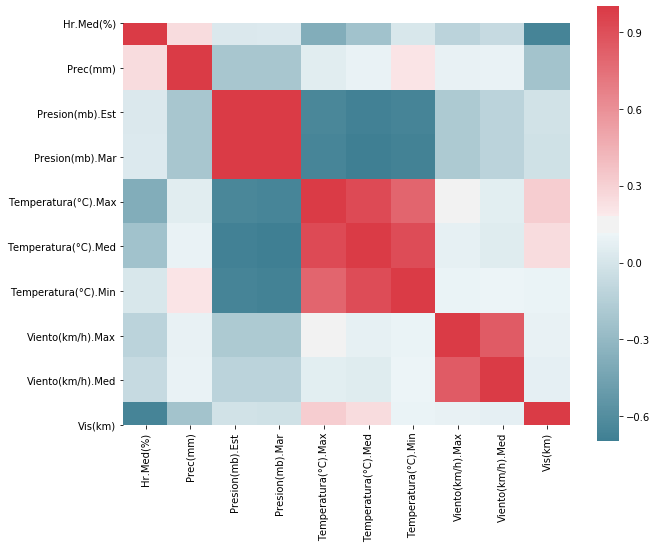

In [35]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

In [36]:
corr

,Hr.Med(%),Prec(mm),Presion(mb).Est,Presion(mb).Mar,Temperatura(°C).Max,Temperatura(°C).Med,Temperatura(°C).Min,Viento(km/h).Max,Viento(km/h).Med,Vis(km)
Hr.Med(%),1.000000,0.257110,0.031298,0.037081,-0.380749,-0.238983,0.018197,-0.116753,-0.073426,-0.659341
Prec(mm),0.257110,1.000000,-0.213532,-0.213359,0.054305,0.096657,0.215300,0.084795,0.096487,-0.229590
Presion(mb).Est,0.031298,-0.213532,1.000000,0.999719,-0.638654,-0.682348,-0.662984,-0.182300,-0.116356,-0.016208
Presion(mb).Mar,0.037081,-0.213359,0.999719,1.000000,-0.653664,-0.697927,-0.677637,-0.181582,-0.116172,-0.023004
Temperatura(°C).Max,-0.380749,0.054305,-0.638654,-0.653664,1.000000,0.924613,0.796939,0.127144,0.058565,0.322762
Temperatura(°C).Med,-0.238983,0.096657,-0.682348,-0.697927,0.924613,1.000000,0.918505,0.082624,0.047957,0.253041
Temperatura(°C).Min,0.018197,0.215300,-0.662984,-0.677637,0.796939,0.918505,1.000000,0.102686,0.111163,0.098501
Viento(km/h).Max,-0.116753,0.084795,-0.182300,-0.181582,0.127144,0.082624,0.102686,1.000000,0.846753,0.090936
Viento(km/h).Med,-0.073426,0.096487,-0.116356,-0.116172,0.058565,0.047957,0.111163,0.846753,1.000000,0.077026
Vis(km),-0.659341,-0.229590,-0.016208,-0.023004,0.322762,0.253041,0.098501,0.090936,0.077026,1.000000
